In [1]:
#impoting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading data and viewing null values if any
train_data = pd.read_excel("D:/Airline Tickets/Data_Train.xlsx")
print(train_data.isnull().sum())
print(train_data[train_data.isna().any(axis=1)])

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64
        Airline Date_of_Journey Source Destination Route Dep_Time  \
9039  Air India       6/05/2019  Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info  Price  
9039  09:25 07 May  23h 40m         NaN         No info   7480  


In [3]:
#deleting null value records
train_data.dropna(inplace=True)
print(train_data.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


In [4]:
#copying dataset to perform featuriazation
data = train_data.copy()
print(data.shape)
print(data.dtypes)

(10682, 11)
Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object


In [5]:
#changing datatypes
#data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])
#data['Dep_Time'] = pd.to_datetime(data['Dep_Time'])
#data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'])

#function to change data type
def datetime(col):
    data[col]=pd.to_datetime(data[col])
    
for feature in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    datetime(feature)
    
print(data.dtypes)


Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object


C:\Users\Pradeep\AppData\Local\Temp\ipykernel_10760\1318083259.py:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data[col]=pd.to_datetime(data[col])


In [6]:
#extracting year,month,day from Date_of_Journey column
data['journey_day']=data['Date_of_Journey'].dt.day
data['journey_month']=data['Date_of_Journey'].dt.month
data['journey_year']=data['Date_of_Journey'].dt.year
data.drop('Date_of_Journey',axis=1,inplace=True)
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-05-13 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-05-13 05:50:00,2023-05-13 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-05-13 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-05-13 18:05:00,2023-05-13 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-05-13 16:50:00,2023-05-13 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [7]:
#removing day,month,year from Dep_Time and Arrival_Time column
def extract_hour_min(df,col):
    df[col+'_hour']=df[col].dt.hour
    df[col+'_minute']=df[col].dt.minute
    df.drop(col,axis=1,inplace=True)

    
extract_hour_min(data,'Dep_Time')
extract_hour_min(data,'Arrival_Time')
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [8]:
#data analysis for departure time and arrival time
def flight_time(x):
    if ( x> 4) and (x<=8 ):
        return 'Early mrng'
    
    elif ( x>8 ) and (x<=12 ):
        return 'Morning'
    
    elif ( x>12 ) and (x<=16 ):
        return 'Noon'
    
    elif ( x>16 ) and (x<=20 ):
        return 'Evening'
    
    elif ( x>20 ) and (x<=24 ):
        return 'Night'
    else:
        return 'Late night'

<AxesSubplot: >

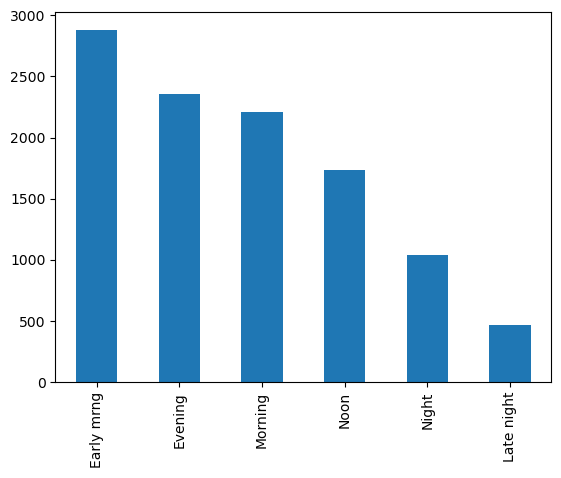

In [9]:
data['Dep_Time_hour'].apply(flight_time).value_counts().plot(kind='bar')

<AxesSubplot: >

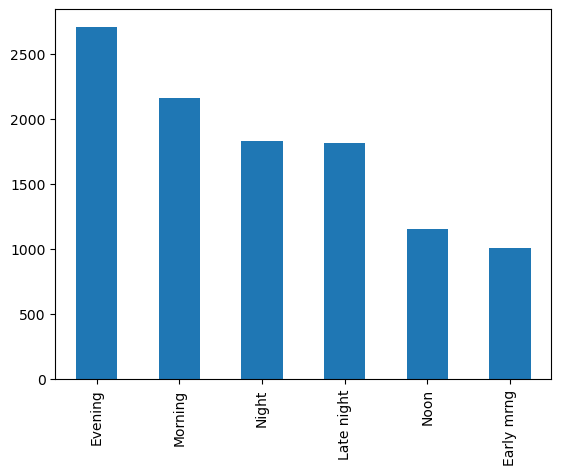

In [10]:
data['Arrival_Time_hour'].apply(flight_time).value_counts().plot(kind='bar')

In [11]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [12]:
#Processing Duration column since we need to make it uniform like 5h 5m
def duration(x):
    if 'h' not in x:
        x='0h '+x
    elif 'm' not in x:
        x=x+' 0m'
    return x
    
data['Duration']=data['Duration'].apply(duration)
data.head()


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [13]:
#splitting hour and minute from Duration column
#print(data['Duration'][0].split(' ')[0]) #splitting hr only but it contains hr string
#print(int(data['Duration'][0].split(' ')[0][0:-1])) #[0:-1] where it will exclude last character and converting it into integer
#print(data['Duration'][0].split(' ')[1]) #splitting min only but it contains min string
#print(int(data['Duration'][0].split(' ')[1][0:-1])) #[0:-1] where it will exclude last character and converting it into integer

#new column for duration hour and duration minute
data['Duration_hours']=data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))
data['Duration_mins']=data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))
data.head()


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


In [14]:
#duration in mins
data['Duration_total_mins']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
data.head()
#example of eval
#eval('2*60+50*1') #converts string expression into python expression

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45,285


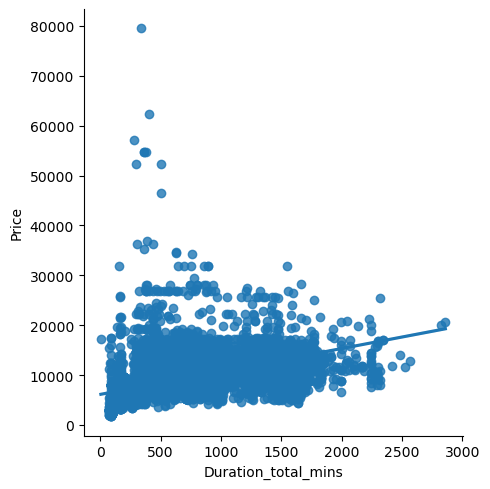

In [15]:
#Price Vs Duration
sns.lmplot(x='Duration_total_mins',y='Price',data=data)
#As duration time increase the price also increases

<AxesSubplot: ylabel='Destination'>

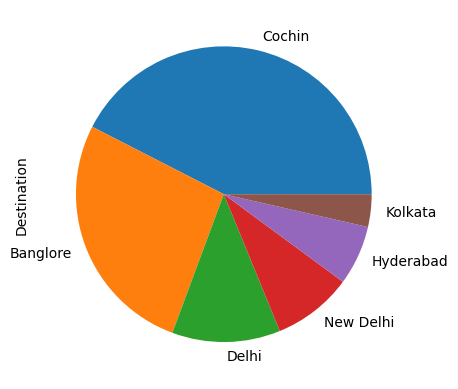

In [16]:
#max final destination
#data['Destination'].unique()
#data['Destination'].value_counts().plot(kind='bar')
data['Destination'].value_counts().plot(kind='pie')
#plt.axis('off')

<AxesSubplot: xlabel='Airline', ylabel='Price'>

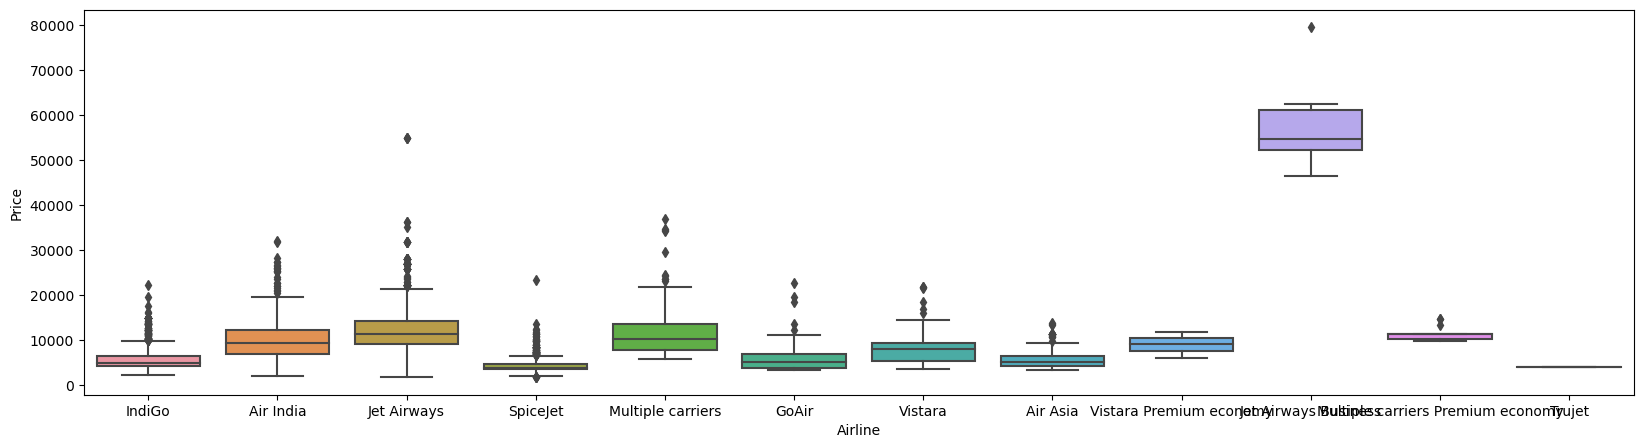

In [17]:
#airline and their price distribution using boxplot
plt.figure(figsize=(20,5))
sns.boxplot(y='Price',x='Airline',data=data)

<AxesSubplot: xlabel='Airline', ylabel='Price'>

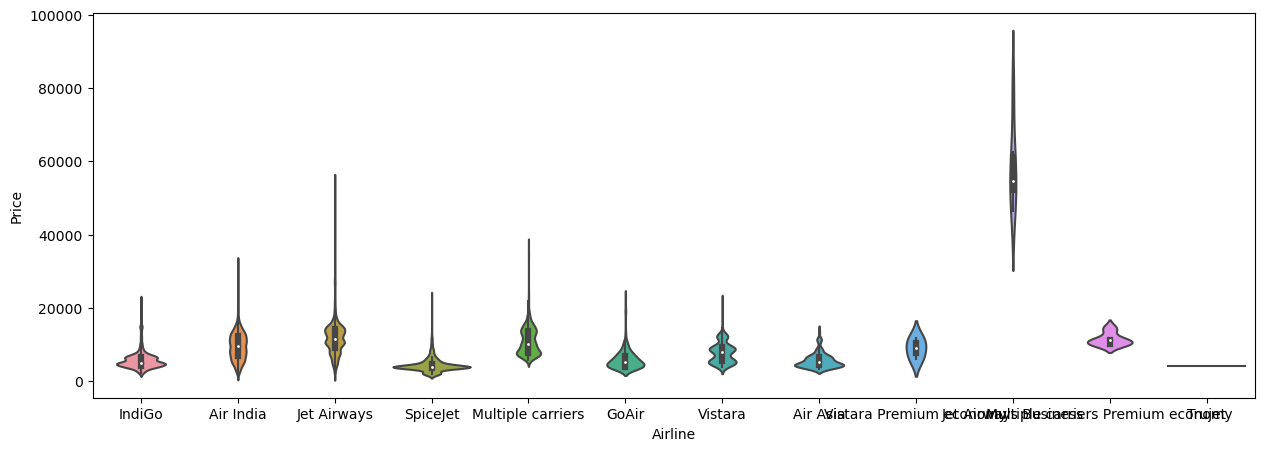

In [18]:
#airline and their price distribution using violinplot(box+distribution)
plt.figure(figsize=(15,5))
sns.violinplot(y='Price',x='Airline',data=data)


In [19]:
#viewing additional_info records value percentage
np.round(data['Additional_Info'].value_counts()/len(data)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

In [20]:
#removing features 
#additional info has more No Info 
#Route since it not a great feature
#Duration_total_mins as already we have Duration_hour Duration_min
#journey_year as it is same value for all record
data.drop(columns=['Additional_Info','Route','Duration_total_mins','journey_year'],axis=1,inplace=True)
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,4,45


In [21]:
#separating categorical and numerical columns
cat_col=[col for col in data.columns if data[col].dtype=='object']
num_col=[col for col in data.columns if data[col].dtype!='object']
#num_col=[col for col in data.columns if data[col].dtype=='int64']
print("categorical columns are : ",cat_col)
print("\nNumerical columns are : ",num_col)

categorical columns are :  ['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

Numerical columns are :  ['Price', 'journey_day', 'journey_month', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours', 'Duration_mins']


In [22]:
#one-hot encoding without using python package for source column
for category in data['Source'].unique():
    data['Source_'+category]=data['Source'].apply(lambda x: 1 if x==category else 0)
    
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25,0,1,0,0,0
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,4,45,1,0,0,0,0


In [23]:
#Target guided encoding on airline column
'''
airlines = data['Airline'].unique()
dict1={key:index for index,key in enumerate(airlines,0)}
dict1
In the above code it is not ordered so we are ordered based on price
'''
airlines=data.groupby(['Airline'])['Price'].mean().sort_values().index
dict={key:index for index,key in enumerate(airlines,0)}
print(dict)
'''
In the above code we haver ordered the name of airline based on mean price from low to high and we need to map the index in the dataset
'''
data['Airline']=data['Airline'].map(dict)
data.head()

{'Trujet': 0, 'SpiceJet': 1, 'Air Asia': 2, 'IndiGo': 3, 'GoAir': 4, 'Vistara': 5, 'Vistara Premium economy': 6, 'Air India': 7, 'Multiple carriers': 8, 'Multiple carriers Premium economy': 9, 'Jet Airways': 10, 'Jet Airways Business': 11}


,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,4,45,1,0,0,0,0


In [24]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [25]:
#we have delhi as two destination so we should replace it
data['Destination'].replace('New Delhi','Delhi',inplace=True)
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [26]:
#Target guided encoding on destination column
dest=data.groupby(['Destination'])['Price'].mean().sort_values().index
dict1={key:index for index,key in enumerate(dest,0)}
print(dict1)
data['Destination']=data['Destination'].map(dict1)
data.head()

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}


,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,Banglore,2,4h 45m,1 stop,13302,3,1,16,50,21,35,4,45,1,0,0,0,0


In [27]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [28]:
#manual encoding on total_stops
stops = {'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}
data['Total_Stops']=data['Total_Stops'].map(stops)
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1,6218,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,Banglore,2,4h 45m,1,13302,3,1,16,50,21,35,4,45,1,0,0,0,0


C:\Users\Pradeep\AppData\Local\Temp\ipykernel_10760\3914968476.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax1)


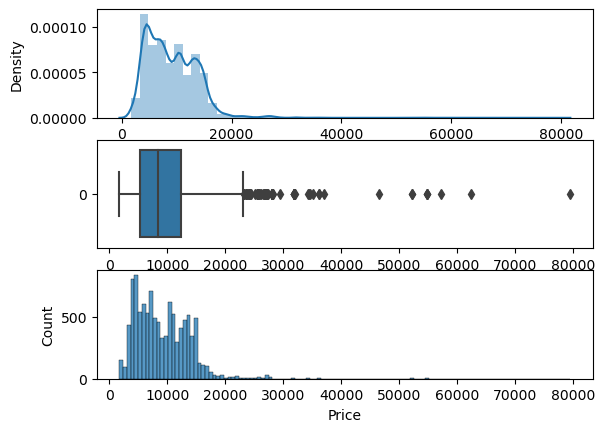

In [29]:
#detecting outliers using plotting
def plot(df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2,orient="h")
    sns.histplot(df[col],ax=ax3)
    
plot(data,'Price')

In [30]:
#outliers using IQR
per25 = data['Price'].quantile(0.25)
per75 = data['Price'].quantile(0.75)
iqr = per75 - per25
print("low_iqr",per25-1.5*iqr)
print("high_iqr",per75+1.5*iqr)
print("Number of outliers",len(data[data['Price']>per75+(1.5*iqr)]))

low_iqr -5367.0
high_iqr 23017.0
Number of outliers 94


C:\Users\Pradeep\AppData\Local\Temp\ipykernel_10760\3914968476.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax1)


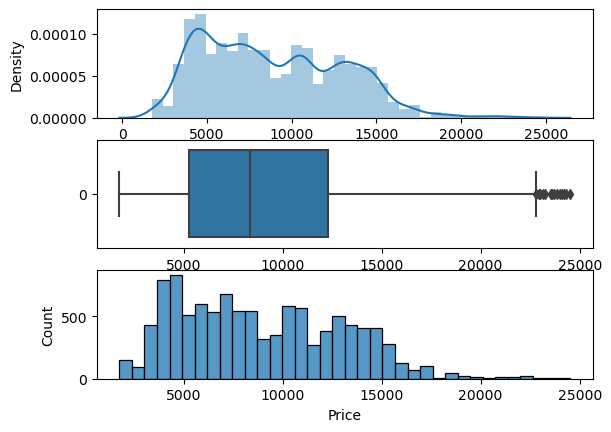

In [31]:
#imputing outliers with median,we can't use mean since it will have a impact from outliers
data['Price']=np.where(data['Price']>=25000,data['Price'].median(),data['Price'])
plot(data,'Price')

In [32]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2,13882.0,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1,6218.0,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,Banglore,2,4h 45m,1,13302.0,3,1,16,50,21,35,4,45,1,0,0,0,0


In [33]:
#removing features and viewing datatypes if we have any object column
data.drop(columns=['Source','Duration'],axis=1,inplace=True)
data.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
journey_day              int64
journey_month            int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Duration_hours           int64
Duration_mins            int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

In [34]:
#feature importance 
from sklearn.feature_selection import mutual_info_regression
X=data.drop(['Price'],axis=1)
y=data['Price']
print(mutual_info_regression(X,y))
imp=pd.DataFrame(mutual_info_regression(X,y),index=X.columns)
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

[0.96355969 0.99811016 0.79041637 0.19582242 0.23101291 0.3347241
 0.25849524 0.40084984 0.34004384 0.46542898 0.34104411 0.38022903
 0.45346214 0.52603833 0.12611241 0.20313238]


,importance
Destination,0.995398
Airline,0.965107
Total_Stops,0.787540
Source_Delhi,0.525961
Duration_hours,0.463217
Source_Kolkata,0.457689
Arrival_Time_hour,0.398395
Source_Banglore,0.377982
Arrival_Time_minute,0.341728
Dep_Time_hour,0.341074


In [35]:
#RandomForestRegressor ML model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
ml_model=RandomForestRegressor()
model=ml_model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([ 6766.97,  9780.89,  4860.18, ...,  2775.05, 18214.05, 10316.28])

In [36]:
#comparing actual vs predicted value
z = y_test.values
data_pred_df = pd.DataFrame(y_pred,columns=["Predicted Price"])
data_pred_df['Actual Price'] = z
data_pred_df

,Predicted Price,Actual Price
0,6766.970000,4544.0
1,9780.890000,9646.0
2,4860.180000,4409.0
3,8034.290000,6610.0
4,7348.348000,12681.0
...,...,...
2666,8501.370000,8085.0
2667,8586.991833,7064.0
2668,2775.050000,2754.0
2669,18214.050000,18275.0


In [37]:
#saving ML model
import pickle
file = open(r'D:/Airline Tickets/random_ml.pkl','wb')
pickle.dump(model,file)
model = open(r'D:/Airline Tickets/random_ml.pkl','rb')
forest = pickle.load(model)
forest.predict(X_test)

array([ 6766.97,  9780.89,  4860.18, ...,  2775.05, 18214.05, 10316.28])

In [38]:
# MAPE function for evaluation
def mape(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

mape(y_test,forest.predict(X_test))

13.383292237272823

In [39]:
# ML pipeline
def predict(ml_model):
    
    model=ml_model.fit(X_train,y_train)
    print('Training_score: {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('Predictions are : {}'.format(y_prediction))
  
    
    from sklearn import metrics
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2_score: {}'.format(r2_score))
    print('MSE : ', metrics.mean_squared_error(y_test,y_prediction))
    print('MAE : ', metrics.mean_absolute_error(y_test,y_prediction))
    print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    print('MAPE : ', mape(y_test,y_prediction))
    
    
    
predict(RandomForestRegressor())

Training_score: 0.9522617589594621
Predictions are : [ 6763.504       9718.17        4802.99       ...  2776.72
 18213.71       10684.32333333]
r2_score: 0.7930845931869165
MSE :  3526433.944144381
MAE :  1201.976624953201
RMSE :  1877.8801729994332
MAPE :  13.395135057196775


In [40]:
#hypertuning ML model
from sklearn.model_selection import RandomizedSearchCV

reg_rf=RandomForestRegressor()

# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=1000,stop=1200,num=24)]

# Number of features to consider at every split
max_features=["auto", "sqrt"]

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=10)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

print(n_estimators)
print(max_features)
print(max_depth)
print(min_samples_split)

# Create the grid or hyper-parameter space
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
    
}


rf_Random=RandomizedSearchCV(reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

rf_Random.fit(X_train,y_train)

### to get your best model..
print(rf_Random.best_params_)

pred2=rf_Random.predict(X_test)

from sklearn import metrics
metrics.r2_score(y_test,pred2)

[1000, 1008, 1017, 1026, 1034, 1043, 1052, 1060, 1069, 1078, 1086, 1095, 1104, 1113, 1121, 1130, 1139, 1147, 1156, 1165, 1173, 1182, 1191, 1200]
['auto', 'sqrt']
[5, 7, 10, 13, 16, 18, 21, 24, 27, 30]
[5, 10, 15, 100]
Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\Pradeep\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


{'n_estimators': 1017, 'min_samples_split': 15, 'max_features': 'auto', 'max_depth': 27}


0.822327208304843